<a href="https://colab.research.google.com/github/belikeamitesh/CS306-Machine-Learning/blob/main/FuzzyCmeans_Evaluation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import random
from random import randrange
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math

1. Implement the Fuzzy C-means clustering algorithm (own code with
K = 3) using the IRIS dataset. Report the results using the
silhouette coefficient and sse indices. Also report the final
partition matrix.

In [ ]:
# importing iris dataset as said in question
data = pd.DataFrame((datasets.load_iris()).data)
target = pd.DataFrame((datasets.load_iris()).target)
print(data.head())
print(target)
print('No. of Features : ',df.shape[1])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]
No. of Features :  4


In [ ]:
df = data;
df = df.sample(frac = 1)

In [ ]:
# sum squared error
def sse(c,a,assignedCluster):
  sse = 0
  for i in range(len(a)):
    sse += np.linalg.norm(a[i] - c[assignedCluster[i]])
  return sse

In [ ]:
# function for the initializing Partition Matrix
def intializePartitionMatrix(n,c):
  newm = []
  # n patterns and c clusters
  for i in range(n):
    x = []
    for j in range(c):
      x.append(random.uniform(0,1))
    newm.append(x)
  # doing so the sum of all memebership values is 1
  for i in range(n):
    sum = 0
    for j in newm[i]:
      sum += j
    newm[i] = [x/sum for x in newm[i]]
  return newm

Fuzzy C Mean Algorithm

In [ ]:
def FuzzyCMean(df,k,m,maxIterations):
  partitionMatrix = intializePartitionMatrix(len(df),k)
  a = list(df.values)
  n = len(a)
  numFeatures = len(a[0])
  # Initializing centers with 0 ( number of clusters * number of features)
  # took care of row sum =1
  c = [[0 for j in range(numFeatures)] for i in range(k)]
  itr = 1
  # run till max iteration
  while itr <= maxIterations:
    # calculating cluster centroids as per formulae
    for j in range(k):
      numer = []
      deno = 0
      for i in range(n):
        numer.append([x*pow(partitionMatrix[i][j],m) for x in a[i]])
        deno += pow(partitionMatrix[i][j],m)
      numer = np.array(numer)
      numer = numer.sum(axis = 0) 
      c[j] = [x/deno for x in numer]
    # updating partition matrix
    for i in range(n):
      for j in range(k):
        sum = 0
        for l in range(k):
          sum += pow(np.linalg.norm(a[i] - c[j])/np.linalg.norm(a[i] - c[l]),2/(m-1))
        partitionMatrix[i][j] = 1/sum
    itr += 1 
  assignedCluster = []
  # assigning final cluster indices according to max membership score in parition matrix
  for i in range(n):
    assignedCluster.append(np.argmax(partitionMatrix[i]))
  return c,partitionMatrix,assignedCluster

Plotting Clusterred Data

In [ ]:
def plotData(a,c,k,assignedCluster):
  #Getting unique labels
  df = pd.DataFrame(a)
  df['label'] = assignedCluster
  centroids = pd.DataFrame(c)
  u_labels = np.unique(assignedCluster)
  #plotting the final clustered results:
  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
  plt.scatter(centroids[0] , centroids[1], s=100,label = 50)
  plt.legend()
  plt.show()  

Defining Parameters to use

In [ ]:
# number of clusters as given in question
k = 3
# degree of fuzzification : usually 2
m = 2
a = list(df.values)
# in FuzzyCMean we are passing the dataframe , no. of clusters , degree of fuzzification and max iterations
c,partitionMatrix,assignedCluster = FuzzyCMean(df,k,m,50)
slscorefuzzy = metrics.silhouette_score(a,assignedCluster, metric='euclidean')

In [ ]:
print('Sum Squared Error : ',sse(c,a,assignedCluster))
print('Silhouette Score of Fuzzy-C Means : ',slscorefuzzy)
print('Assigned Cluster Indices : ',assignedCluster)

Sum Squared Error :  96.81684877446773
Silhouette Score of Fuzzy-C Means :  0.5495175126471615
Assigned Cluster Indices :  [0, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1]


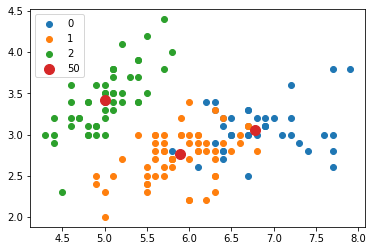

In [ ]:
plotData(a,c,k,assignedCluster)

2.Compare the result of the above-mentioned technique with the
K-means (you can use library function for K-means) algorithm
using silhouette coefficient.

In [ ]:
# Inbuilt Implementation of K means
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
silhouettescore = metrics.silhouette_score(df, labels, metric='euclidean')

In [ ]:
print('Silhouetter Score for K-Means:',silhouettescore)

Silhouetter Score for K-Means: 0.5528190123564091


Final Partition Matrix

In [ ]:
print(partitionMatrix)

[[0.911946789696622, 0.0751492455082724, 0.012903964795105733], [0.2712531834593056, 0.7077703647886507, 0.02097645175204368], [0.14506104866311353, 0.6365160567043673, 0.21842289463251924], [0.030307932479874775, 0.06555668437313274, 0.9041353831469925], [0.25938259718344847, 0.7069790569946066, 0.03363834582194495], [0.8314467109825329, 0.1564396180764654, 0.012113670941001856], [0.07272690428768201, 0.9156565702600783, 0.011616525452239599], [0.8908235462897128, 0.09473356340074604, 0.014442890309541153], [0.009177171786987674, 0.020182677698150433, 0.9706401505148619], [0.21127381859392155, 0.7547865689780575, 0.03393961242802095], [0.009838125714301881, 0.023242582757729974, 0.9669192915279681], [0.0174955672401115, 0.03557907900047579, 0.9469253537594127], [0.0882419794445145, 0.8996450738049343, 0.012112946750551114], [0.868674342206923, 0.11733391396437952, 0.013991743828697513], [0.2283825033369917, 0.7498956362048234, 0.021721860458184836], [0.006414578529279606, 0.0137594999

Comparing Silhouetter Score of Fuzzy C Means and K-Means Algorithm

In [ ]:
print("Final Score For K-Means",silhouettescore)
print("Final Score For Fuzzy C Means",slscorefuzzy)

Final Score For K-Means 0.5528190123564091
Final Score For Fuzzy C Means 0.5495175126471615
